#### Data looks like Apache log while i have opened in the notebook. Now i have parse that notebook log file with python and saving it to csv file after creating the data as pandas data frame.

In [34]:
import re
import pandas as pd
from datetime import datetime

log_file = r"D:\Information Technology\calgary_access_log" # log file path

log_pattern = r'(?P<host>\S+) \S+ \S+ \[(?P<timestamp>[^\]]+)\] "(?P<method>\S+) (?P<resource>\S+) \S+" (?P<status>\d{3}) (?P<bytes>\d+)' # defining a pattern
 
parsed_data = [] # Initialize a list to store parsed lines

with open(log_file, 'r', encoding='utf-8', errors='ignore') as file: #  Read and parse the log file
    for line in file:
        match = re.match(log_pattern, line)
        if match:
            data = match.groupdict()
            data['timestamp'] = datetime.strptime(data['timestamp'], "%d/%b/%Y:%H:%M:%S %z") # Convert timestamp string to datetime object
            parsed_data.append(data)

In [36]:
df = pd.DataFrame(parsed_data) # Create DataFrame 

print(df.head()) # prining the data

df.to_csv("calgary_access_log_parsed.csv", index=False) # Save to CSV, if needed

    host                  timestamp method    resource status  bytes
0  local  1994-10-24 13:41:41-06:00    GET  index.html    200    150
1  local  1994-10-24 13:41:41-06:00    GET       1.gif    200   1210
2  local  1994-10-24 13:43:13-06:00    GET  index.html    200   3185
3  local  1994-10-24 13:43:14-06:00    GET       2.gif    200   2555
4  local  1994-10-24 13:43:15-06:00    GET       3.gif    200  36403


## 1. Plot Number of Requests Per Minute / Hour / Day

In [39]:
df.info() # pringing the info here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664362 entries, 0 to 664361
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   host       664362 non-null  object
 1   timestamp  664362 non-null  object
 2   method     664362 non-null  object
 3   resource   664362 non-null  object
 4   status     664362 non-null  object
 5   bytes      664362 non-null  object
dtypes: object(6)
memory usage: 30.4+ MB


## 1. Plot Number of Requests Per Minute / Hour / Day

C:\Users\Dell\AppData\Local\Temp\ipykernel_15508\3674215964.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  requests_per_minute = df.resample('T').size()


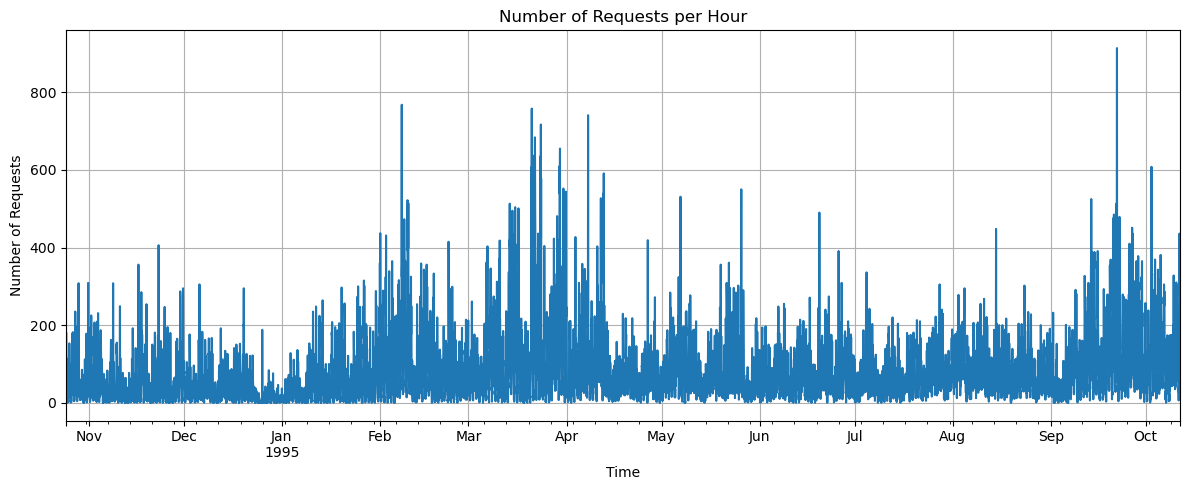

In [41]:
import matplotlib.pyplot as plt 

# Convert to datetime index
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df.set_index('timestamp', inplace=True)

# Resample by minute, hour, and day
requests_per_minute = df.resample('T').size()
requests_per_hour = df.resample('h').size()
requests_per_day = df.resample('D').size()

# Plot hourly requests
plt.figure(figsize=(12, 5))
requests_per_hour.plot()
plt.title("Number of Requests per Hour")
plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Find Most Requested Resources

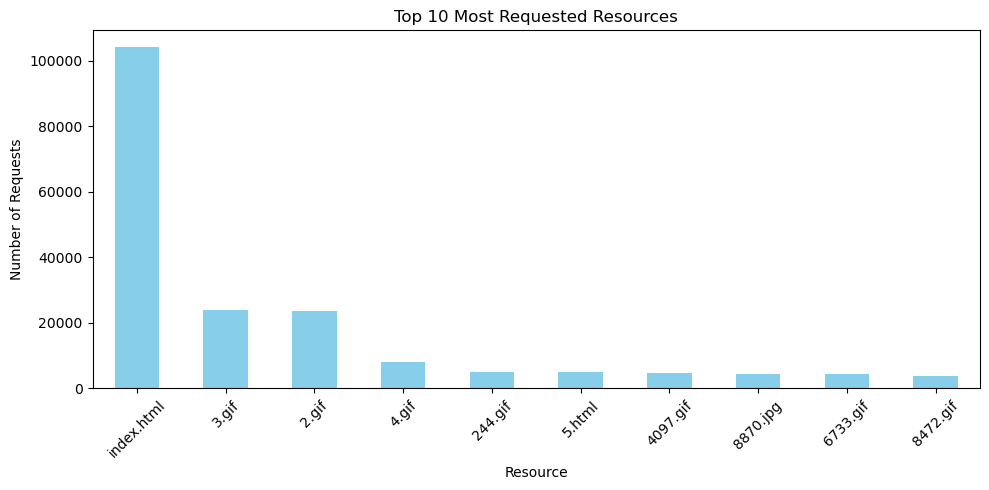

In [46]:
top_resources = df['resource'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_resources.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Requested Resources")
plt.xlabel("Resource")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Most requested resources are the 'index.html' and apart from it we can see few more status of requested resource

## 3. Count by Status Codes (e.g., 200, 404)

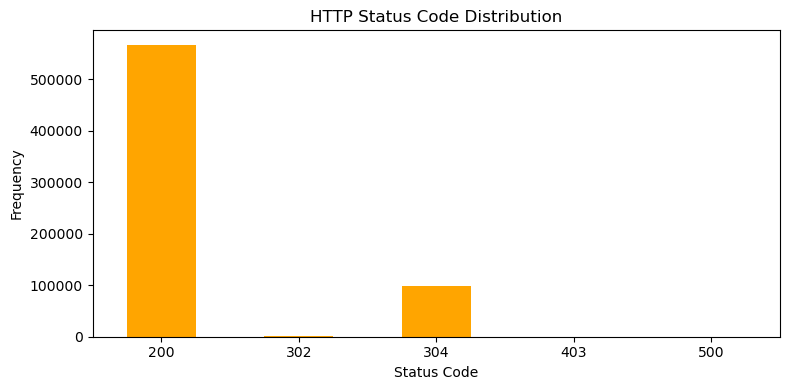

In [51]:
status_counts = df['status'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
status_counts.plot(kind='bar', color='orange')
plt.title("HTTP Status Code Distribution")
plt.xlabel("Status Code")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### http 200 status code represents the 'request successful' and here in the above plot we can see the volume of all the status code 

## 4. Analyze Traffic Volume Over Time (Rolling Average)

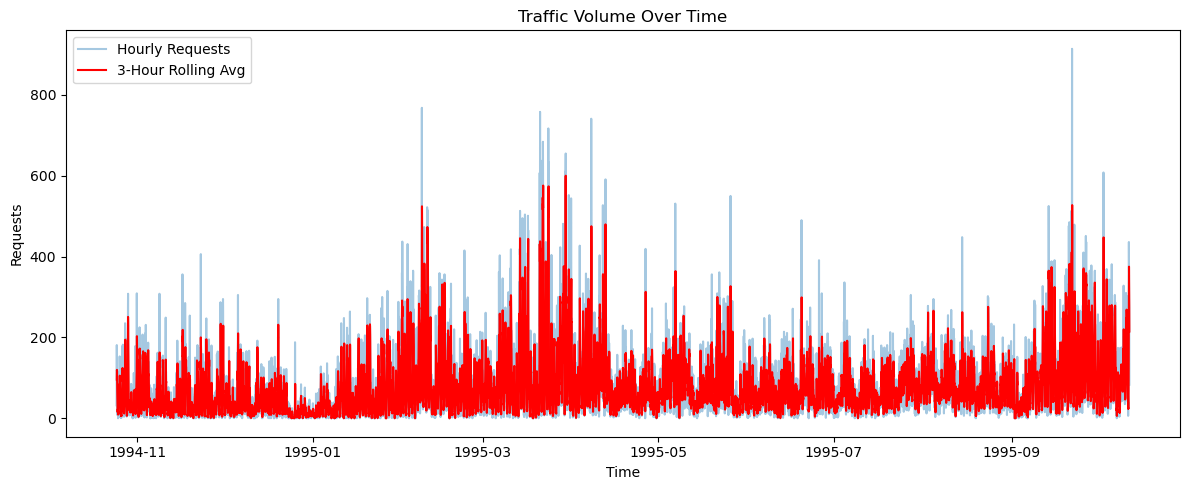

In [54]:
# Smooth out spikes using a rolling window average
rolling_traffic = requests_per_hour.rolling(window=3).mean() # calclating average of request in current hour and two more hours right before
# this rolling average calculation is for reducing the noise and can give a better visibility in the plot.
plt.figure(figsize=(12, 5))
plt.plot(requests_per_hour.index, requests_per_hour, label='Hourly Requests', alpha=0.4)
plt.plot(rolling_traffic.index, rolling_traffic, label='3-Hour Rolling Avg', color='red')
plt.title("Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Requests")
plt.legend()
plt.tight_layout()
plt.show()
